# As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience.

As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a classification problem.

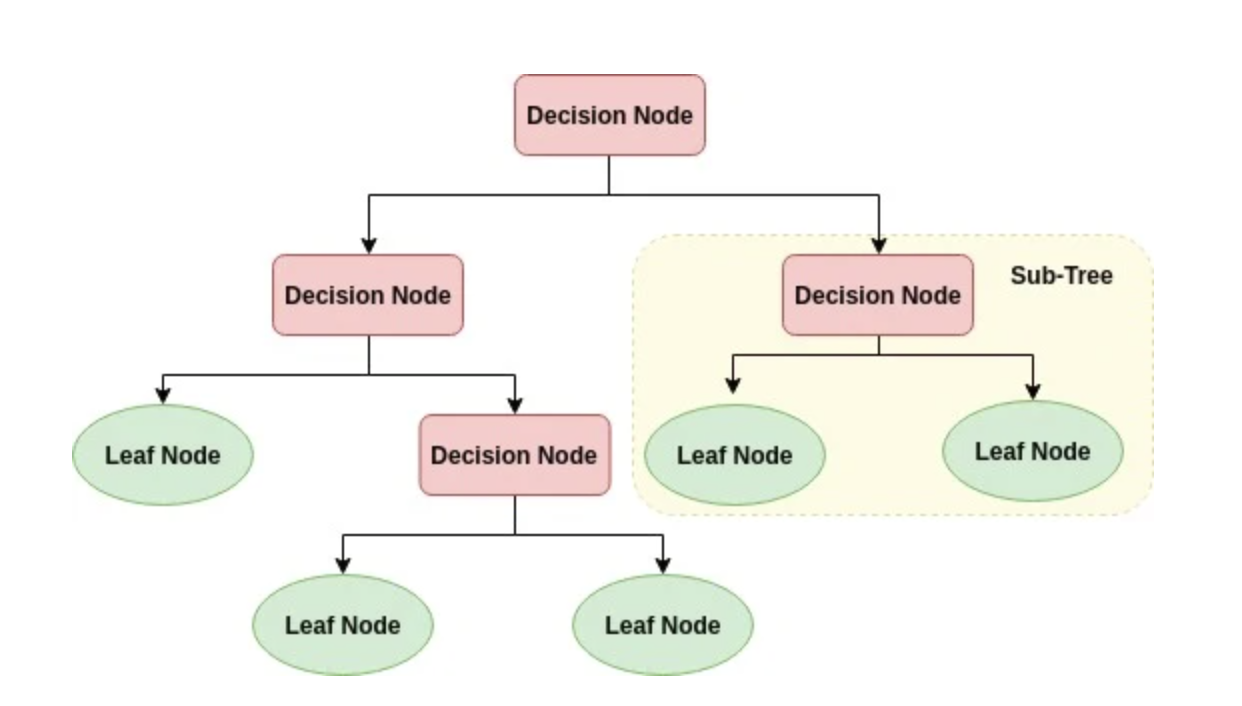

In [1]:
from IPython.display import Image
Image("/Users/priyashaprasad/Desktop/Screenshot 2020-07-08 at 4.22.53 PM.png")

# Loading the libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Loading the dataset

In [4]:
df = pd.read_csv('/Users/priyashaprasad/Downloads/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.columns


Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')

In [7]:
df.shape

(768, 9)

768 records, 9 columns

# Feature Selection

In [8]:
X = df.drop('Outcome',axis=1)
y = df.Outcome

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [35]:
feature_cols = X.columns
feature_cols

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age'],
      dtype='object')

In [12]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# Splitting the dataset using train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


# Importing the Classfier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()

# Fitting the data

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_pred = model.predict(X_test)

# Evaluating the Model

In [22]:
model.score(X_test,y_test)

0.6883116883116883

Model accuracy - test data

In [23]:
model.score(X_train,y_train)

1.0

Model accuracy - training data

# Predicting the values

In [24]:
y_pred = model.predict(X_test)

In [25]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(10)

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,1
726,0,0
472,0,0
233,0,1
385,0,0
556,0,0
59,0,0


# Optimizing Decision Tree Performance

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.7987012987012987)


The accuracy increased to 79.87%, which is better accuracy than the previous model.

In [51]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(20)

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
472,0,0
233,0,0
385,0,0
556,0,0
59,0,0
